# DAI Capstone III - Jorge Salazar
Fitness trackers are small devices with rapidly growing capabilities
Consumers are becoming more data driven as technology interfaces with our lives in the hopes of making it more convenient.
New growth in the fitness industry has made gym attire into a fashion statement.
I would like to explore Fitbit Tracker data to find insights on device usage.
### Link to the data source
This first section of code imports all the necessary libraries for statistics and visualizations. The file was opened from a Google Drive folder. The first five rows are returned to check for proper import of file.

In [ ]:
# Imported libraries for EDA and visualization capabilities
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from scipy import stats

#Connect drive and import file
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
fitbit_df = pd.read_csv('/content/gdrive/My Drive/ColabNotebooks/dailyActivity_merged.csv')
# Alternate code for importing downloaded file in case link doesn't load
# from google.colab import files
# uploaded = files.upload()

#Check first 5 columns of data, change value for more or less values
fitbit_df.head()

Mounted at /content/gdrive


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# EDA
I chose the Fitbit dataset found on [Kaggle.com](https://www.kaggle.com/datasets/arashnic/fitbit).
This dataset measured daily user activity of 33 users over the course of two months between 03/12/16 to 05/12/16 totaling 31 day entries. It contains 940 rows and 15 columns of data. Some of the variables include ID, date, calories, minutes and distances.
*Distance is measured in Km*
# Data Cleaning
The data required no cleaning but due to the nature of the device there are times where you have a distance of a few Km traveled in under a minute. This could be due to breaking between activity zones during activity. There needs to be changes made to the attribution of distance and time intervals during data collection.


In [ ]:
# Begin EDA by showing columns and data types.
fitbit_df.info()
# Collecting values data
print('There are {} unique values in the ID column.'.format(fitbit_df['Id'].nunique(0)))
print('There are {} unique values in the ActivityDate column.'.format(fitbit_df['ActivityDate'].nunique(0)))
print('The shape of the dataframe is {}.'.format(fitbit_df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

# Creating the Main Data Model
Here, I wanted to begin wrangling the data to separate entries where 'VeryActiveMinutes' is 0 or less. I want to use statistical analysis to explore the differences between these categories. This section includes checks to ensure data integrity. This removes entries which were only in the light to moderate range. The idea was to separate athletic activity from the rest, creating a control group for the entries. VeryActive group still retains LightActivity but the NotVeryActive data frame has been stripped of all VeryActiveMinutes entries. If that day's entry had VeryActiveMinutes>0 then it is considered VeryActive.

In [ ]:
#This data will be splitting the data frames to separate VeryActiveDistance from entries where a 0 was entered
VeryActive_df = fitbit_df.loc[fitbit_df['VeryActiveMinutes'] > 0]
NotVeryActive_df = fitbit_df.loc[fitbit_df['VeryActiveMinutes'] <=0]
# Assurance the code executed
print('Data has been split.')

Data has been split.


In [ ]:
# Verifying the results of data split
VeryActive_df.info()
print('There are {} unique values in the ID column.'.format(VeryActive_df['Id'].nunique(0)))
VeryActive_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        531 non-null    int64  
 1   ActivityDate              531 non-null    object 
 2   TotalSteps                531 non-null    int64  
 3   TotalDistance             531 non-null    float64
 4   TrackerDistance           531 non-null    float64
 5   LoggedActivitiesDistance  531 non-null    float64
 6   VeryActiveDistance        531 non-null    float64
 7   ModeratelyActiveDistance  531 non-null    float64
 8   LightActiveDistance       531 non-null    float64
 9   SedentaryActiveDistance   531 non-null    float64
 10  VeryActiveMinutes         531 non-null    int64  
 11  FairlyActiveMinutes       531 non-null    int64  
 12  LightlyActiveMinutes      531 non-null    int64  
 13  SedentaryMinutes          531 non-null    int64  
 14  Calories  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
# Verifying the results of data split
NotVeryActive_df.info()
print('There are {} unique values in the ID column.'.format(NotVeryActive_df['Id'].nunique(0)))
NotVeryActive_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 30 to 929
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        409 non-null    int64  
 1   ActivityDate              409 non-null    object 
 2   TotalSteps                409 non-null    int64  
 3   TotalDistance             409 non-null    float64
 4   TrackerDistance           409 non-null    float64
 5   LoggedActivitiesDistance  409 non-null    float64
 6   VeryActiveDistance        409 non-null    float64
 7   ModeratelyActiveDistance  409 non-null    float64
 8   LightActiveDistance       409 non-null    float64
 9   SedentaryActiveDistance   409 non-null    float64
 10  VeryActiveMinutes         409 non-null    int64  
 11  FairlyActiveMinutes       409 non-null    int64  
 12  LightlyActiveMinutes      409 non-null    int64  
 13  SedentaryMinutes          409 non-null    int64  
 14  Calories 

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,5/12/2016,0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0,0,0,1440,0
31,1624580081,4/12/2016,8163,5.31,5.31,0.0,0.0,0.0,5.31,0.00,0,0,146,1294,1432
32,1624580081,4/13/2016,7007,4.55,4.55,0.0,0.0,0.0,4.55,0.00,0,0,148,1292,1411
33,1624580081,4/14/2016,9107,5.92,5.92,0.0,0.0,0.0,5.91,0.01,0,0,236,1204,1572
34,1624580081,4/15/2016,1510,0.98,0.98,0.0,0.0,0.0,0.97,0.00,0,0,96,1344,1344


In [ ]:
# Testing control group for isolation for proof of data cleanliness before testing
NotVeryActive_df[['VeryActiveMinutes', 'VeryActiveDistance']].describe().head(2)

,VeryActiveMinutes,VeryActiveDistance
count,409.0,409.0
mean,0.0,0.0


# Statistical Testing Methods
The statistical tests being used will be the Independent T-test and Pearson-R test at a 95%c.i. Scatterplots and histograms were used to visualize mean and distribution. Frequent counts and checks are done throughout the process to ensure data integrity.

# Hypothesis 1:
* Ha: VeryActive group will correlate with a longer total distance.
* H0: There is no correlation between activity and distance.

In [ ]:
# Independent T-Test to verify pvalue is < 0.05
stats.ttest_ind(VeryActive_df['TotalDistance'], NotVeryActive_df['TotalDistance'])

Ttest_indResult(statistic=24.15253459118069, pvalue=1.3227522858608677e-100)

PearsonRResult(statistic=0.8133750633208388, pvalue=1.4816919985951725e-126)
PearsonRResult(statistic=0.9084585501567324, pvalue=2.7957735928859396e-156)


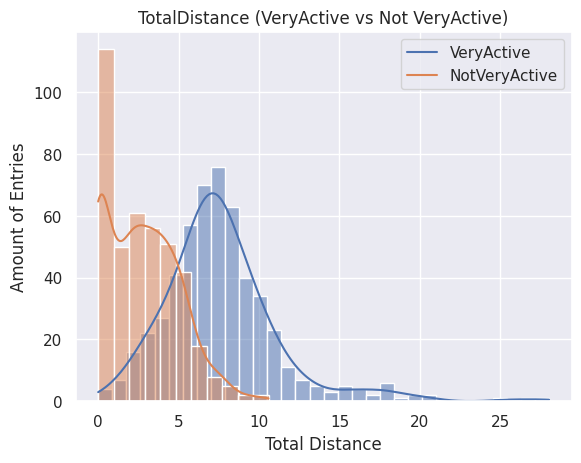

In [ ]:
# Histograms overlay to show relationship visually along with pearsonr results printed
ax = sns.histplot(VeryActive_df['TotalDistance'], kde=True).set(title="TotalDistance (VeryActive vs Not VeryActive)")
ax = sns.histplot(NotVeryActive_df['TotalDistance'], kde=True)
ax.set(xlabel='Total Distance', ylabel='Amount of Entries')
ax.legend(labels=["VeryActive","NotVeryActive"])
print(stats.pearsonr(VeryActive_df['VeryActiveDistance'], VeryActive_df['TotalDistance']))
print(stats.pearsonr(NotVeryActive_df['LightActiveDistance'], NotVeryActive_df['TotalDistance']))
# LightActivity up to 5km, VeryActive between 5km and 10km on average

PearsonRResult(statistic=0.7625898567905596, pvalue=3.8343904067166074e-102)

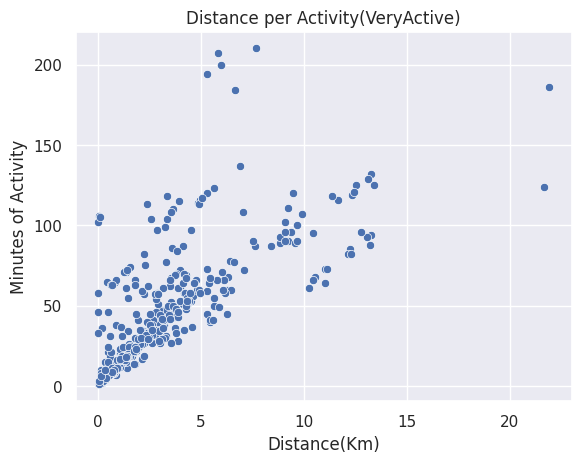

In [ ]:
# Scatterplot showing the relationship between Minutes and Distance
bx = sns.scatterplot(y="VeryActiveMinutes", x="VeryActiveDistance", data=VeryActive_df)
bx.set(title="Distance per Activity(VeryActive)")
bx.set(xlabel='Distance(Km)', ylabel='Minutes of Activity')
stats.pearsonr(VeryActive_df['VeryActiveMinutes'], VeryActive_df['VeryActiveDistance'])
# 5k under an hour appears to be the most common workout

In [ ]:
# Showing means in a summary table with counts included to verify data integrity
print(VeryActive_df[['TotalDistance','VeryActiveDistance','LightActiveDistance']].describe().head(2))
#Count: 531/940
print(NotVeryActive_df[['TotalDistance','VeryActiveDistance','LightActiveDistance']].describe().head(2))
#Count: 409/940

       TotalDistance  VeryActiveDistance  LightActiveDistance
count     531.000000          531.000000           531.000000
mean        7.621412            2.660113             3.954708
       TotalDistance  VeryActiveDistance  LightActiveDistance
count     409.000000               409.0           409.000000
mean        2.722127                 0.0             2.543814


# Hypothesis 1: Findings
* The results indicated a strong correlation checking the hypothesis that VeryActive group will have a higher TotalDistance. Ha is True.
* This can be further verified by the mean being higher at 7.62Km vs 2.72Km.
* Pearson R:  0.76, positive correlation.
* T-test and pvalue < 0.05.
* LightActivity up to 5km, VeryActive between 5km and 10km on average.
* 5k under an hour appears to be the most common VeryActive workout.

# Hypothesis 2:
* Ha: NotVeryActive group will correlate with more minutes of LightActivity on average than the VeryActive group.
* H0: There is no correlation between NotVeryActive and minutes of LightActivity.

In [ ]:
# Independent T-Test to verify pvalue is < 0.05
stats.ttest_ind(VeryActive_df['LightlyActiveMinutes'], NotVeryActive_df['LightlyActiveMinutes'])

Ttest_indResult(statistic=7.298816324156282, pvalue=6.184760860596487e-13)

PearsonRResult(statistic=0.8047531359930121, pvalue=6.544788755634796e-122)
PearsonRResult(statistic=0.9465154684582744, pvalue=4.775703741945747e-202)


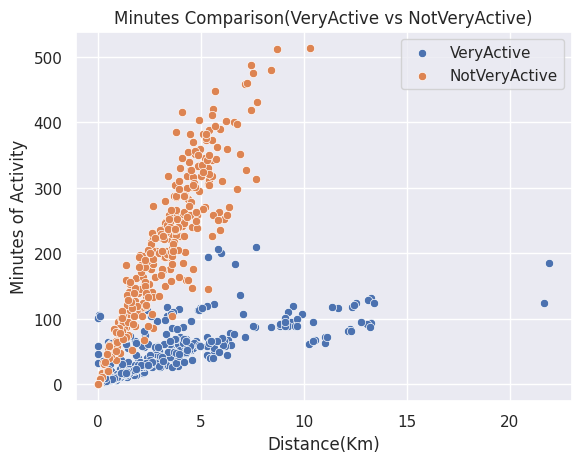

In [ ]:
# Scatterplot overlay to show relationship visually along with pearsonr results printed
cx = sns.scatterplot(y="VeryActiveMinutes", x="VeryActiveDistance", data=VeryActive_df).set(title="Minutes Comparison(VeryActive vs NotVeryActive)")
cx = sns.scatterplot(y="LightlyActiveMinutes", x="LightActiveDistance", data=NotVeryActive_df)
cx.set(xlabel='Distance(Km)', ylabel='Minutes of Activity')
cx.legend(labels=["VeryActive","NotVeryActive"])
print(stats.pearsonr(VeryActive_df['LightlyActiveMinutes'], VeryActive_df['LightActiveDistance']))
print(stats.pearsonr(NotVeryActive_df['LightlyActiveMinutes'], NotVeryActive_df['LightActiveDistance']))
# VeryActive occurs mostly at shorter time intervals, while LightActivity shows longer time intervals

PearsonRResult(statistic=0.9465154684582744, pvalue=4.775703741945747e-202)

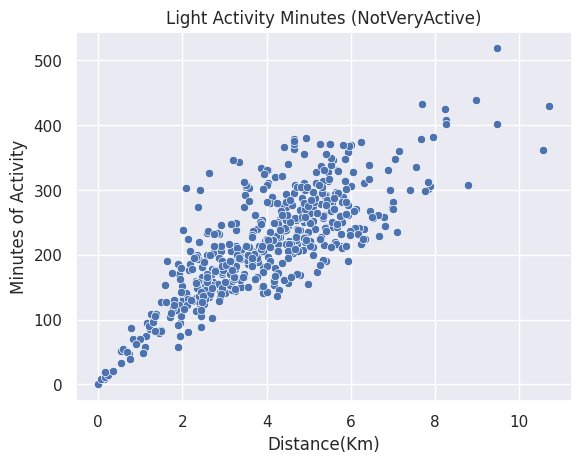

In [ ]:
# Scatterplot showing the relationship between Minutes and Distance
dx = sns.scatterplot(y="LightlyActiveMinutes", x="LightActiveDistance", data=VeryActive_df)
dx.set(title="Light Activity Minutes (NotVeryActive)")
dx.set(xlabel='Distance(Km)', ylabel='Minutes of Activity')
stats.pearsonr(NotVeryActive_df['LightlyActiveMinutes'], NotVeryActive_df['LightActiveDistance'])
# Slow and steady wins the race

In [ ]:
# Showing means in a summary table with counts included to verify data integrity
print(VeryActive_df[['VeryActiveMinutes','LightlyActiveMinutes',]].describe().head(2))
print(NotVeryActive_df[['VeryActiveMinutes','LightlyActiveMinutes']].describe().head(2))
# VeryActive group still outperforms LightlyActive in average minutes

       VeryActiveMinutes  LightlyActiveMinutes
count         531.000000            531.000000
mean           37.467043            215.013183
       VeryActiveMinutes  LightlyActiveMinutes
count              409.0             409.00000
mean                 0.0             163.99022


# Hypothesis 2: Findings
* LightlyActive activity does correlate with more minutes of activity. Ha is true.
* PearsonR: 0.76, positive correlation.
* T-Test and Pvalue <0.05
* VeryActive group still outperforms LightlyActive in average minute
* VeryActive occurs mostly at shorter time intervals, while LightActivity shows longer time intervals

# Hypothesis 3:
* Ha: VeryActive TotalDistance will have a correlation with Calories burned.
* H0: There is no correlation between Calories burned and TotalDistance.

In [ ]:
# Independent T-Test to verify pvalue is < 0.05
stats.ttest_ind(VeryActive_df['Calories'], NotVeryActive_df['Calories'])

Ttest_indResult(statistic=15.95181227831493, pvalue=7.250599641322777e-51)

PearsonRResult(statistic=0.4065647557340486, pvalue=1.4870883009468088e-22)
PearsonRResult(statistic=0.4263162065383284, pvalue=1.719004059624399e-19)


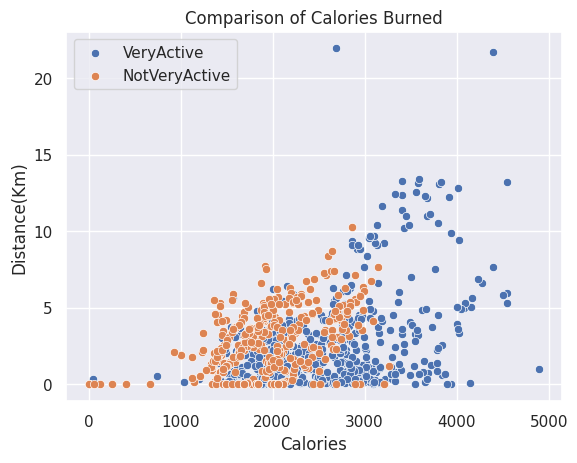

In [ ]:
# Scatterplot overlay to show relationship visually along with pearsonr results printed
ex = sns.scatterplot(y="VeryActiveDistance" , x="Calories", data=VeryActive_df).set(title="Comparison of Calories Burned")
ex = sns.scatterplot(y="LightActiveDistance" , x="Calories", data=NotVeryActive_df)
ex.set(xlabel='Calories', ylabel='Distance(Km)')
ex.legend(labels=["VeryActive","NotVeryActive"])
print(stats.pearsonr(VeryActive_df['VeryActiveDistance'], VeryActive_df['Calories']))
print(stats.pearsonr(NotVeryActive_df['LightActiveDistance'], NotVeryActive_df['Calories']))
# Weak PearsonR correlation can be observed. It should be noted VeryActive group still outperforms in average

PearsonRResult(statistic=0.4065647557340486, pvalue=1.4870883009468088e-22)

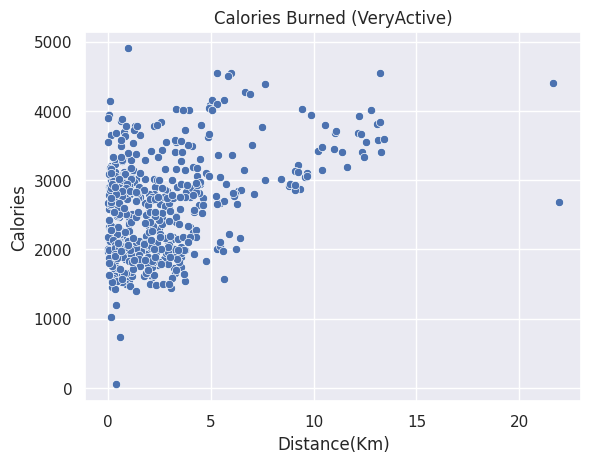

In [ ]:
# Scatterplot showing the relationship between Calories and VeryActiveDistance
fx = sns.scatterplot(y="Calories", x="VeryActiveDistance", data=VeryActive_df)
fx.set(title="Calories Burned (VeryActive)")
fx.set(xlabel='Distance(Km)', ylabel='Calories')
stats.pearsonr(VeryActive_df['VeryActiveDistance'], VeryActive_df['Calories'])
# Range for VeryActive from 1500 to 4000 calories, under 5k

[Text(0.5, 0, 'Distance(Km)'), Text(0, 0.5, 'Calories')]

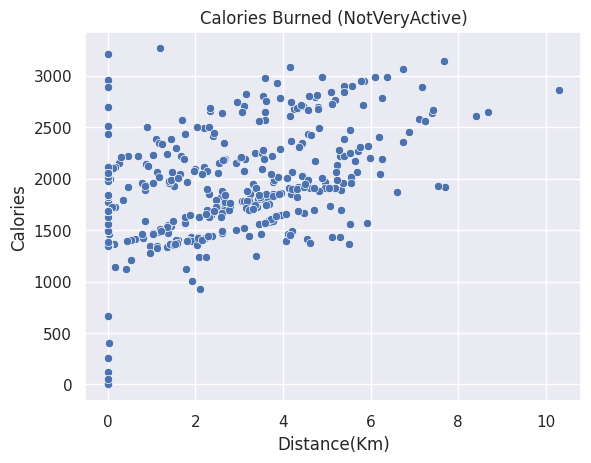

In [ ]:
# Scatterplot showing the relationship between Calories and LightActiveDistance
gx = sns.scatterplot(y="Calories", x="LightActiveDistance", data=NotVeryActive_df)
gx.set(title="Calories Burned (NotVeryActive)")
gx.set(xlabel= "Distance(Km)", ylabel= "Calories")
# Range appears to be between 1000 and 3000 calories, with 0 to 6km

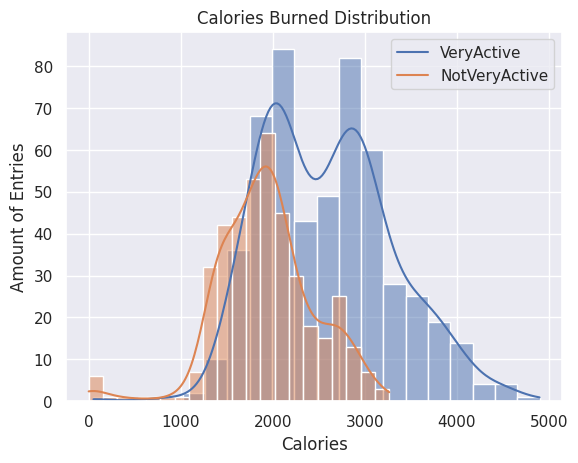

In [ ]:
# Histograms overlay to show relationship visually
hx = sns.histplot(VeryActive_df['Calories'], kde=True).set(title="Calories Burned Distribution")
hx = sns.histplot(NotVeryActive_df['Calories'], kde=True)
hx.set(xlabel='Calories', ylabel='Amount of Entries')
hx.legend(labels=["VeryActive","NotVeryActive"])
# VeryActive group appears to match on LightActivity along with a surge at the 3000 range

In [ ]:
# Showing means in a summary table with counts included to verify data integrity
print(VeryActive_df[['Calories','VeryActiveDistance','LightActiveDistance']].describe().head(2))
print(NotVeryActive_df[['Calories','VeryActiveDistance','LightActiveDistance']].describe().head(2))
# Average calories burned is higher in the VeryActive group

          Calories  VeryActiveDistance  LightActiveDistance
count   531.000000          531.000000           531.000000
mean   2594.612053            2.660113             3.954708
          Calories  VeryActiveDistance  LightActiveDistance
count   409.000000               409.0           409.000000
mean   1925.804401                 0.0             2.543814


# Hypothesis 3: Findings
* Weak PearsonR correlation can be observed. Ha is true.
* PearsonR: 0.40, positive correlation
* T-Test and pvalue<0.05
* Range for VeryActive from 1500 to 4000 calories, under 5k
* Range for LightActive appears to be between 1000 and 3000 calories, with 0 to 6km
* Average calories burned is higher in the VeryActive group

# Results Summary
* **Hypothesis 1:** The VeryActive group was found to have a higher mean TotalDistance of 7.62Km vs 2.72Km. This is due to higher exertion and participation in various marathons.
* **Hypothesis 2:** LightlyActive activity does correlate with more minutes of activity. Hard effort is usually sustained for under an hour on average for about 5Km of distance. LightlyActive group ranges from 2-3 hours daily.
* **Hypothesis 3:** VeryActive does not correlate strongly with more calories burned. But the finding has statistical signifcance. The mean is higher, especially at upper ends of performance.

*VeryActive group still had higher than average results in all categories*.

# Recommendations
* Although so many of these questions seem very obvious, the visualization aspect of data makes mundane questions seem more meaningful. Fitbit Tracker users and so many others are joining the 'quantified everything' world and I believe they want to see what's important to them on the go. The importance of a good dashboard becomes apparent in these situations and the Fitbit Tracker can benefit from a "Sport Mode" for sprints and other exercises that shouldn't be mixed in with LightActivity. We should use this data as a marketing tool to reinforce the benefits of exercise and encourage dashboard customization for users who are not interested in being VeryActive.
* Further, a larger study with more people would help to determine athletic applications. 33 total users doesn't cover a wide enough population to tease out demographic information from this data. So although my findings will probably still hold true, it looks as though there's an even split in the VeryActive and NotVeryActive populations. I would like to explore the demographics within these two populations so that they can be more directly served by this product.